In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
# show number of descriptions from different sources
raw = pd.read_csv('../data/00_baseline/raw_data.csv')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   startup_ID                   4246 non-null   int64 
 1   description_startupdetector  592 non-null    object
 2   startup_description          4112 non-null   object
 3   industry                     4246 non-null   object
dtypes: int64(1), object(3)
memory usage: 132.8+ KB


In [3]:
df_full = pd.read_csv('../data/00_baseline/dataset_full.csv')
train = pd.read_csv('../data/00_baseline/train.csv')
val = pd.read_csv('../data/00_baseline/validation.csv')
test = pd.read_csv('../data/00_baseline/test.csv')
all = {
    "full": df_full, 
    "train": train,
    "validation": val,
    "test": test
    }

In [4]:
# add name of industry based on label
# Opening JSON file
with open('../data/00_baseline/info.json') as json_file:
    info_dict = json.load(json_file)

label_text_map = info_dict['label_text_map']

def translate_label_industry(label):
    return list(label_text_map.keys())[list(label_text_map.values()).index(int(label))]

for df in all.values():
    df['industry'] = df['labels'].apply(translate_label_industry)

## Display basic statistics of the dataset

full information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4246 non-null   int64 
 1   startup_ID   4246 non-null   int64 
 2   description  4246 non-null   object
 3   industry     4246 non-null   object
 4   labels       4246 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 166.0+ KB
None
train information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3438 entries, 0 to 3437
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  3438 non-null   object
 1   labels       3438 non-null   int64 
 2   industry     3438 non-null   object
dtypes: int64(1), object(2)
memory usage: 80.7+ KB
None
validation information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 3 columns):
 #   Column       

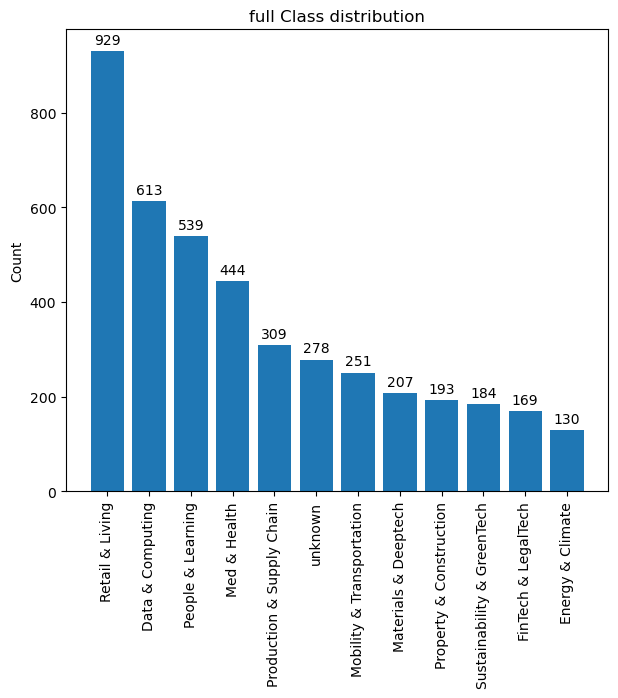

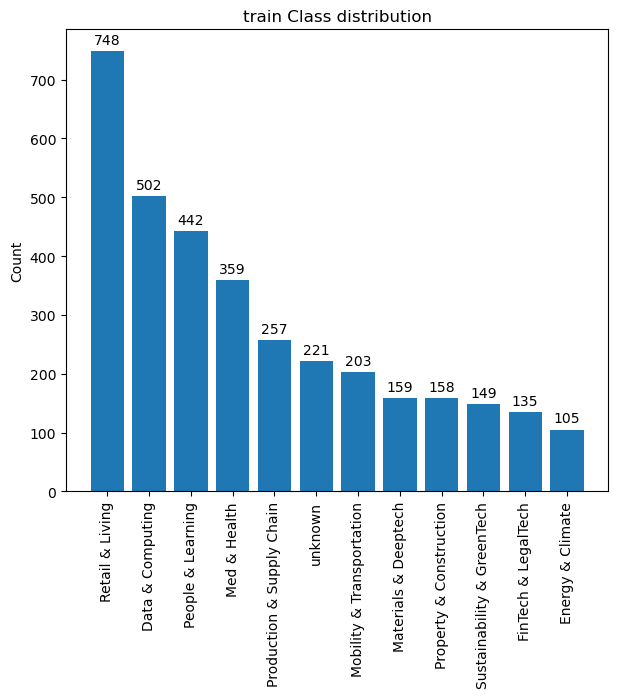

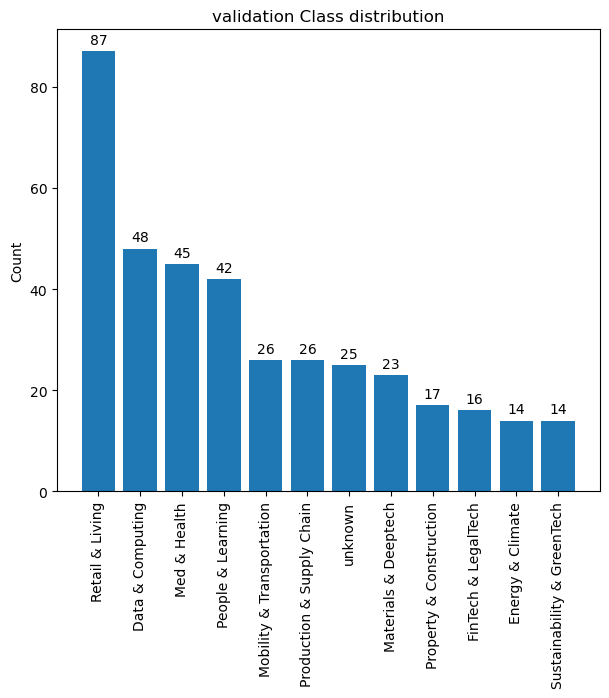

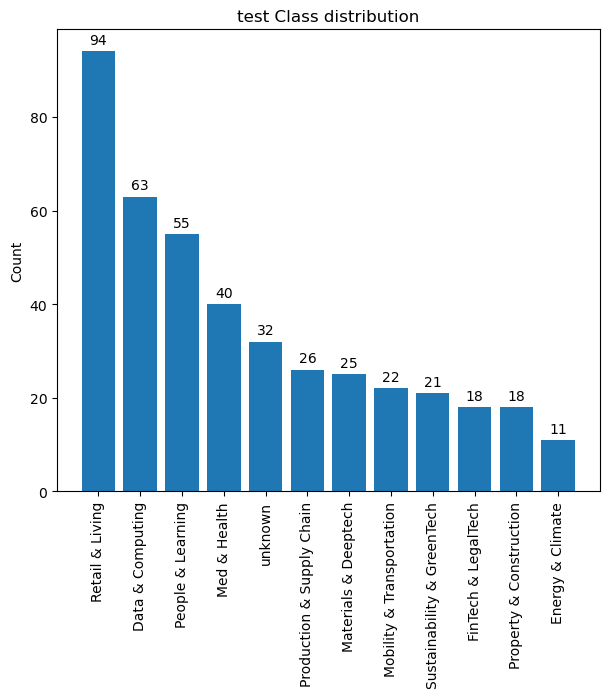

In [5]:
for name, df in all.items():
    print(f"{name} information:")
    print(df.info())

for name, df in all.items():
    # print(f"{name} Class distribution:")
    value_counts = df['industry'].value_counts().sort_values(ascending=False)

    plt.figure(figsize=(7, 6))
    plt.bar_label(plt.bar(value_counts.index, value_counts.values), label_type='edge', padding=3)
    plt.title(f"{name} Class distribution")
    #plt.xlabel("Class")
    plt.xticks(value_counts.index, rotation='vertical')
    plt.ylabel("Count")
    plt.show()


In [6]:
# get value counts of descriptions to see if they are all unique
# Filter and display non-unique values
duplicate_descriptions = df_full[df_full.duplicated(keep=False, subset='description')]
print("Non-unique values:")
print(duplicate_descriptions.info())

Non-unique values:
<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 12 to 4241
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   370 non-null    int64 
 1   startup_ID   370 non-null    int64 
 2   description  370 non-null    object
 3   industry     370 non-null    object
 4   labels       370 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 17.3+ KB
None


In [7]:
# get duplicate description pairs
dup_pairs = df_full.groupby(['description']).size()                                 
dup_pairs = dup_pairs[dup_pairs > 1]
dup_pairs.info()
dup_pairs.to_csv()

<class 'pandas.core.series.Series'>
Index: 51 entries, AI powered drones built for multi varied applications via APIs. Autonomous assistance in agriculture; surveillance, detection, counting, segmentation of crops and fields. Using this sustainable business model for further development and making the machine capable for transport in logistics in local regions. to unknown
Series name: None
Non-Null Count  Dtype
--------------  -----
51 non-null     int64
dtypes: int64(1)
memory usage: 816.0+ bytes


'description,0\r\n"AI powered drones built for multi varied applications via APIs. Autonomous assistance in agriculture; surveillance, detection, counting, segmentation of crops and fields. Using this sustainable business model for further development and making the machine capable for transport in logistics in local regions.",2\r\n"An architect and a lawyer quit their jobs to found a dumpling startup. They thought it was a good idea to save bread and make delicious dumplings out of it. In fact, it was nothing like that, and it was just a simple idea.",2\r\n"BIO is committed to speaking up for the millions of families around the globe who depend upon our success. We will drive a revolution that aims to cure patients, protect our climate, and nourishes humanity.",2\r\n"Brento bread baking mixes contain only high-quality and natural ingredients, but no artificial additives. Insect flour is characterised above all by a nutty taste, a high protein content and many valuable vitamins and min

In [8]:
# export duplicate_descriptions for further analysis
duplicate_descriptions.to_csv('../data/exploration/duplicate_descriptions.csv', index=False)

In [9]:
# try to find outliers by analysing length of descriptions
df_full['len_description'] = df_full['description'].apply(lambda x: len(x))
df_full.head(5)

,Unnamed: 0,startup_ID,description,industry,labels,len_description
0,0,5365,To find the causes for complex polygenic disea...,Materials & Deeptech,3,352
1,1,5212,APS Networks is using a blend of development s...,Data & Computing,0,296
2,2,971,ChillChoc is your time-out in hectic everyday ...,Sustainability & GreenTech,10,250
3,3,1370,TASTEMAKER is a Swabian watch brand which saw ...,Retail & Living,9,251
4,4,2982,Holoride combines navigational and car data wi...,Mobility & Transportation,5,299


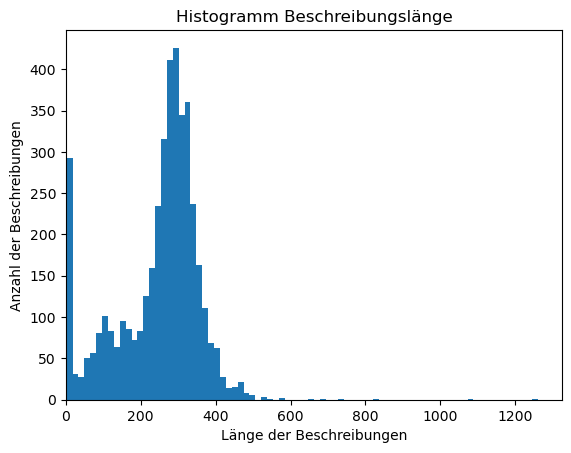

In [10]:
df_full['len_description'].plot.hist(bins=80)
plt.title("Histogramm Beschreibungslänge")
plt.xlabel("Länge der Beschreibungen")
plt.ylabel("Anzahl der Beschreibungen")
plt.xlim(left=0)
plt.show()

In [11]:
df_full.sort_values('len_description', ascending=False).head(10)

,Unnamed: 0,startup_ID,description,industry,labels,len_description
3680,3680,5969,First Vision is not a company but an idea to b...,People & Learning,6,1262
1740,1740,2522,DroneXchange Pte Ltd was established in August...,Mobility & Transportation,5,1087
465,465,1635,BrandMaker is a leading European provider of i...,Retail & Living,9,833
2746,2746,1003,Kites (Karlsruhe Information Technology Soluti...,Data & Computing,0,728
1387,1387,252,Meminto is a long-standing project of mine tha...,Retail & Living,9,682
64,64,3501,Our tools are developed in such a way that the...,Retail & Living,9,661
3253,3253,657,We have made it our mission to revolutionize f...,Retail & Living,9,582
3183,3183,1791,Our service remains available to you. Convenie...,Retail & Living,9,569
4169,4169,2435,to focus on creating great products. Our parti...,Production & Supply Chain,7,547
4150,4150,263,HQS provides software for material scientists ...,Data & Computing,0,535


In [12]:
df_full.sort_values('len_description', ascending=False).tail(10)

,Unnamed: 0,startup_ID,description,industry,labels,len_description
1125,1125,2571,unknown,unknown,11,7
1139,1139,3599,unknown,unknown,11,7
2503,2503,3472,unknown,unknown,11,7
1141,1141,3461,unknown,unknown,11,7
1470,1470,3156,unknown,unknown,11,7
419,419,2566,unknown,FinTech & LegalTech,2,7
248,248,1997,Health,Med & Health,4,6
372,372,2026,unknow,unknown,11,6
4104,4104,2140,law,FinTech & LegalTech,2,3
722,722,5748,in,Med & Health,4,2


## Ideas for possible problems from inspecting the data

- Startupdetector descriptions could be uneven distributet over classes (3623 descriptions + 583 startupdetector descriptions)
  - possibly merge sd industry labels to get more sd descriptions to work


- try topic modelling to find differences to our industry labels (possible outliers within classes?)

## discovered Problems:
1. corrupted data
 - description values like "unknown", "no information" -> identified through identical lengths and dublicate descriptions --> drop these rows
 - really short descriptions like "law" or "in" (single word descriptions) --> drop all rows where description length is under a certain threshold (string length < 50) + issues found through manual checking
2. duplicates --> find duplicate descriptions and keep only first example. (a lot of corrupted data points are also duplicates)
3. class imbalance --> many examples for retail & living -> could bias the prediction towards this class --> data augmentation for underrepresented and random undersampling for overrepresented industries
4. mislabel issues --> 2 approaches: lda topic modelling + cleanlab -> flaging possible mislabels and correct them manually